# Scraped Fixtures API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedFixturesAPI/Scraped%20Fixtures%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Fixtures API

The goal of Scraped Fixtures API is to collect and return scraped fixtures by the given filters or fixture IDs. This can be done by using the `ScrapedFixturesAPI` class and calling appropriate methods


#### 1. Request by filters

Fixtures can be retrieved for specific filters, by calling the `get_fixtures` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`imos` List of IMOs

`message_ids` List of MessageIDs

`external_message_ids` List of ExternalMessageIDs


`received_date_from` Earliest date the fixture received

`received_date_to` Latest date the fixture received

`updated_date_from` Earliest date the fixture updated

`updated_date_to` Latest date the fixture updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by fixture IDs

Fixtures can be retrieved for specific fixture IDs, by calling the `get_fixtures_by_fixture_ids` method with the following argument:

#### Required

`fixture_ids` A list of fixture ids to retrieve

### Additional optional arguments

Both methods, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, in_line_order, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_vessel_name, scraped_deadweight, scraped_year_built, scraped_laycan, scraped_load, scraped_load2, scraped_discharge, scraped_discharge_options, scraped_discharge2, scraped_charterer, scraped_cargo_type, scraped_quantity, scraped_rate, scraped_rate_options, scraped_delivery_date, scraped_delivery, scraped_redelivery_from, scraped_redelivery_to
```

`include_vessel_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
vessel_name, deadweight, year_built, liquid_capacity, vessel_type_id, vessel_type, vessel_class, commercial_operator_id, commercial_operator
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
load_name, load_taxonomy, load_name2, load_taxonomy2, discharge_name, discharge_taxonomy, discharge_name2, discharge_taxonomy2, charterer, cargo_type, cargo_group, open_geo_name, open_taxonomy, delivery_name, delivery_taxonomy, redelivery_from_name, redelivery_from_taxonomy, redelivery_to_name, redelivery_to_taxonomy, charter_type, fixture_status
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private, is_invalidated, is_partial
```

> Default value is `True` for the arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_fixtures import ScrapedFixturesAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedFixturesAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedFixturesAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker fixtures received the last 2 days, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(days=2)

And then call `get_fixtures` method, as below

In [6]:
scraped_fixtures = api.get_fixtures(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
)

next(iter(scraped_fixtures), None)

ScrapedFixture(fixture_id=127587691, message_id=47408085, external_message_id=None, parsed_part_id=58413840, line_from=29, line_to=29, in_line_order=None, source='Email', updated_date=datetime.datetime(2023, 9, 13, 13, 45, 23, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2023, 9, 13, 13, 42, 38, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='celeste nova', scraped_deadweight=None, scraped_year_built=None, imo=9534054, vessel_name='Celeste Nova', deadweight=318510, year_built=2013, liquid_capacity=347277, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=84, vessel_class='VLCC', commercial_operator_id=1891, commercial_operator='Zodiac Maritime', scraped_laycan='10/16/2023', laycan_from=datetime.datetime(2023, 10, 16, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2023, 10, 16, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='usg', load_geo_id=24676, load_name='US Gulf', load_taxonomy_id=4, load_taxonomy='Level0', scraped

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_fixtures)

df.head()

,fixture_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,fixture_status_id,fixture_status,is_owners_option,is_coa,content,subject,sender,is_private,is_invalidated,is_partial
0,127587691,47408085,None,58413840,29,29,NaN,Email,2023-09-13 13:45:23+00:00,2023-09-13 13:42:38+00:00,...,0.0,OnSubs,False,False,celeste nova 270 nhc usg/ukc 10/16/2023 ls 2.5...,SOUTHPORT MARITIME VLCC REPORT,Southport Maritime,False,False,False
1,127587692,47408085,None,58413840,30,30,NaN,Email,2023-09-13 13:45:23+00:00,2023-09-13 13:42:38+00:00,...,2.0,Failed,False,True,izki 270 nhc usg/east 10/15/2023 coa occidenti...,SOUTHPORT MARITIME VLCC REPORT,Southport Maritime,False,False,False
2,127587693,47408085,None,58413840,23,23,NaN,Email,2023-09-13 13:45:23+00:00,2023-09-13 13:42:38+00:00,...,0.0,OnSubs,False,False,maran lyra sines 18/09,SOUTHPORT MARITIME VLCC REPORT,Southport Maritime,False,False,True
3,127587694,47408085,None,58413840,21,21,NaN,Email,2023-09-13 13:45:23+00:00,2023-09-13 13:42:38+00:00,...,0.0,OnSubs,False,False,seatriumph rdam 17/09,SOUTHPORT MARITIME VLCC REPORT,Southport Maritime,False,False,True
4,127587695,47408085,None,58413840,17,17,NaN,Email,2023-09-13 13:45:23+00:00,2023-09-13 13:42:38+00:00,...,0.0,OnSubs,False,False,dhalkut pore 13/09,SOUTHPORT MARITIME VLCC REPORT,Southport Maritime,False,False,True


#### Request by IMOs

To get fixtures for specific vessel(s) by their IMO number(s), you can simple call the `get_fixtures` method for a list of desired IMO(s)

Adding some date argument is always feasible

In [8]:
imos = [9534054, 9588469, 9893096, 9453999, 9402328]  # Or add a list of your desired IMOs

scraped_fixtures_by_imos = api.get_fixtures(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
    imos=imos,
)

df_by_imos = pd.DataFrame(scraped_fixtures_by_imos)
df_by_imos.head()

,fixture_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,fixture_status_id,fixture_status,is_owners_option,is_coa,content,subject,sender,is_private,is_invalidated,is_partial
0,127587691,47408085,None,58413840,29,29,None,Email,2023-09-13 13:45:23+00:00,2023-09-13 13:42:38+00:00,...,0.0,OnSubs,False,False,celeste nova 270 nhc usg/ukc 10/16/2023 ls 2.5...,SOUTHPORT MARITIME VLCC REPORT,Southport Maritime,False,False,False
1,127590300,47409930,None,58415449,57,57,None,Email,2023-09-13 14:25:17+00:00,2023-09-13 14:22:43+00:00,...,0.0,OnSubs,False,False,None,MJLF USG SUEZMAX POSITIONS,MJLF,False,False,True
2,127594119,47411896,None,58417217,9,9,None,Email,2023-09-13 15:09:39+00:00,2023-09-13 15:07:11+00:00,...,0.0,OnSubs,False,False,None,MJLF USG AFRAMAX POSITION LIST – BSS CORPUS CH...,MJLF,False,False,True
3,127602762,47413689,None,58418933,61,61,None,Email,2023-09-13 16:04:54+00:00,2023-09-13 16:03:44+00:00,...,NaN,None,False,False,celeste nova 270 16/10 usg/ta $2.50m exxon,SIMPSON | SPENCE | YOUNG LONDON VLCC COB REPOR...,SSY,False,False,False
4,127603733,47413937,None,58419159,16,16,None,Email,2023-09-13 16:12:04+00:00,2023-09-13 16:07:55+00:00,...,0.0,OnSubs,False,True,None,MJLF PANPAC AFRAMAX POSITION LIST,MJLF,False,False,True


#### Request by Message or ExternalMessage IDs

To retrieve fixtures for particular message ID(s), you should include an extra parameter called `message_ids` when using the `get_fixtures` method. This parameter should contain a list of message IDs. For instance,

In [9]:
message_ids = [47406384, 47413937, 47415977]
scraped_fixtures_by_message_ids = api.get_fixtures(
    vessel_type=vessel_type,
    message_ids=message_ids,
)

next(iter(scraped_fixtures_by_message_ids), None)

ScrapedFixture(fixture_id=127585222, message_id=47406384, external_message_id=None, parsed_part_id=58412545, line_from=32, line_to=32, in_line_order=None, source='Email', updated_date=datetime.datetime(2023, 9, 13, 13, 16, 58, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2023, 9, 13, 13, 14, 52, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='tbn', scraped_deadweight=None, scraped_year_built=None, imo=None, vessel_name=None, deadweight=None, year_built=None, liquid_capacity=None, vessel_type_id=0, vessel_type=None, vessel_class_id=None, vessel_class=None, commercial_operator_id=None, commercial_operator=None, scraped_laycan='01/oct', laycan_from=datetime.datetime(2023, 10, 1, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2023, 10, 1, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='wafr', load_geo_id=24772, load_name='Africa Atlantic Coast', load_taxonomy_id=4, load_taxonomy='Level0', scraped_load2=None, load_geo_id2=None, lo

You can achieve a similar result for external message IDs by providing an argument called `external_message_ids`.

#### Request by Fixture IDs

In the same manner, to get data for specific fixtures ID(s), you must call the `get_fixtures_by_fixture_ids` method for a list of desired fixture ID(s)

Date arguments are not available in this method

In [10]:
fixture_ids = [102145930, 102078599, 102080476, 102095717, 102078587]  # Or add a list of your desired fixture IDs

scraped_fixtures_by_ids = api.get_fixtures_by_fixture_ids(
    fixture_ids=fixture_ids,
)

df_by_ids = pd.DataFrame(scraped_fixtures_by_ids)
df_by_ids.head()

,fixture_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,fixture_status_id,fixture_status,is_owners_option,is_coa,content,subject,sender,is_private,is_invalidated,is_partial
0,102078587,30802065,None,45796535,62,62,None,Email,2022-11-17 16:50:38+00:00,2022-11-17 16:47:52+00:00,...,0.0,OnSubs,False,False,shenlong spirit bahamas 17 nov - subs,EVENING SUEZMAX FIXTURE REPORT FROM SIMPSON SP...,SSY,False,False,True
1,102078599,30802065,None,45796535,76,76,None,Email,2022-11-17 16:50:38+00:00,2022-11-17 16:47:52+00:00,...,0.0,OnSubs,False,False,ridgebury john zipser 130 25-26 nov wafr/ukc w...,EVENING SUEZMAX FIXTURE REPORT FROM SIMPSON SP...,SSY,False,False,False
2,102080476,30802185,None,45796726,49,49,None,Email,2022-11-17 16:53:58+00:00,2022-11-17 16:52:03+00:00,...,NaN,None,False,False,red nova 270 10/12 usg/ukc $8.0m p66,SIMPSON | SPENCE | YOUNG LONDON VLCC COB REPOR...,SSY,False,False,False
3,102095717,30806098,None,45801752,74,74,None,Email,2022-11-17 23:04:04+00:00,2022-11-17 23:00:57+00:00,...,0.0,OnSubs,False,False,nordic cross 145 usg/ukcm 27-28nov w200 exxon ...,"THE MJLF DIRTY DISH - NOVEMBER 17, 2022",MJLF,False,False,False
4,102145930,30841280,None,45829800,46,46,None,Email,2022-11-18 11:45:18+00:00,2022-11-18 11:43:41+00:00,...,NaN,None,False,False,tbn 260 18/12 wafr/ukc w142.5 equinor,SIMPSON | SPENCE | YOUNG LONDON VLCC MORNING R...,SSY,False,False,False


#### Usage of optional arguments

By default, all fields are returned. In many cases, it is convenient to select specific columns. For example, if we want to compare scraped and mapped fields

In [11]:
scraped_mapped_columns = [
    'scraped_vessel_name',
    'vessel_name',
    'scraped_quantity',
    'quantity',
    'scraped_charterer',
    'charterer',
    'scraped_laycan',
    'laycan_from',
    'laycan_to',
]

scraped_mapped_df = pd.DataFrame(scraped_fixtures, columns=scraped_mapped_columns)

scraped_mapped_df.head()

,scraped_vessel_name,vessel_name,scraped_quantity,quantity,scraped_charterer,charterer,scraped_laycan,laycan_from,laycan_to
0,celeste nova,Celeste Nova,270,270000.0,exxom,ExxonMobil,10/16/2023,2023-10-16 00:00:00+00:00,2023-10-16 00:00:00+00:00
1,izki,Izki,270,270000.0,occidential,Occidental,10/15/2023,2023-10-15 00:00:00+00:00,2023-10-15 00:00:00+00:00
2,maran lyra,Maran Lyra,None,NaN,None,None,18/09,NaT,NaT
3,seatriumph,Seatriumph,None,NaN,None,None,17/09,NaT,NaT
4,dhalkut,Dhalkut,None,NaN,None,None,13/09,NaT,NaT


## Examples

Let's start by fetching all tanker fixtures received the last week

In [12]:
example_vessel_type = 1  # Tanker
example_date_from = datetime.utcnow() - timedelta(days=7)

example_scraped_fixtures = api.get_fixtures(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped fixtures

The `is_deleted` property of a scraped fixture indicates whether it is valid or not. If it is set to `True`, the corresponding `fixture_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped fixtures in the following examples.

In [13]:
example_scraped_fixtures = [fixture for fixture in example_scraped_fixtures if not fixture.is_deleted]

next(iter(example_scraped_fixtures), None)

ScrapedFixture(fixture_id=127256323, message_id=47139446, external_message_id=None, parsed_part_id=58222893, line_from=8, line_to=8, in_line_order=None, source='Email', updated_date=datetime.datetime(2023, 9, 8, 14, 51, 7, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2023, 9, 8, 14, 47, 26, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name=None, scraped_deadweight=None, scraped_year_built=None, imo=9555292, vessel_name='T Matterhorn', deadweight=47981, year_built=2010, liquid_capacity=53806, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=88, vessel_class='MR2', commercial_operator_id=103, commercial_operator='Ardmore Shipping', scraped_laycan=None, laycan_from=None, laycan_to=None, scraped_load=None, load_geo_id=None, load_name=None, load_taxonomy_id=None, load_taxonomy=None, scraped_load2=None, load_geo_id2=None, load_name2=None, load_taxonomy_id2=None, load_taxonomy2=None, scraped_discharge=None, scraped_discharge_options=None, discharge_

Now, we are ready to insert our data into a dataframe and keep only specific fields

In [14]:
example_columns = [
    'imo',
    'charterer',   
    'laycan_from',
    'load_name',
    'is_deleted',
]

data = pd.DataFrame(example_scraped_fixtures, columns=example_columns).astype({'imo': 'Int64'})

data.head()

,imo,charterer,laycan_from,load_name,is_deleted
0,9555292,None,NaT,None,False
1,9455741,None,NaT,None,False
2,9391505,None,NaT,None,False
3,9669897,None,NaT,None,False
4,<NA>,Chevron,2023-09-14 00:00:00+00:00,US Gulf,False


#### Top 10 Charterers

In this example, we will find the top 10 Charterers, based on the number of distinct voyages

In [15]:
top_chrtr_ser = data[['charterer', 'imo']].drop_duplicates().charterer.value_counts().head(10)

top_chrtr_df = top_chrtr_ser.to_frame(name='FixtureCount').reset_index().rename(columns={'index': 'Charterer'})

top_chrtr_df

,Charterer,FixtureCount
0,Unipec,46
1,BP,35
2,Total,30
3,Aramco Trading Company,30
4,Shell,30
5,Vitol,22
6,Trafigura,21
7,Repsol,19
8,Reliance,17
9,Chevron,15


And display results in a bar plot

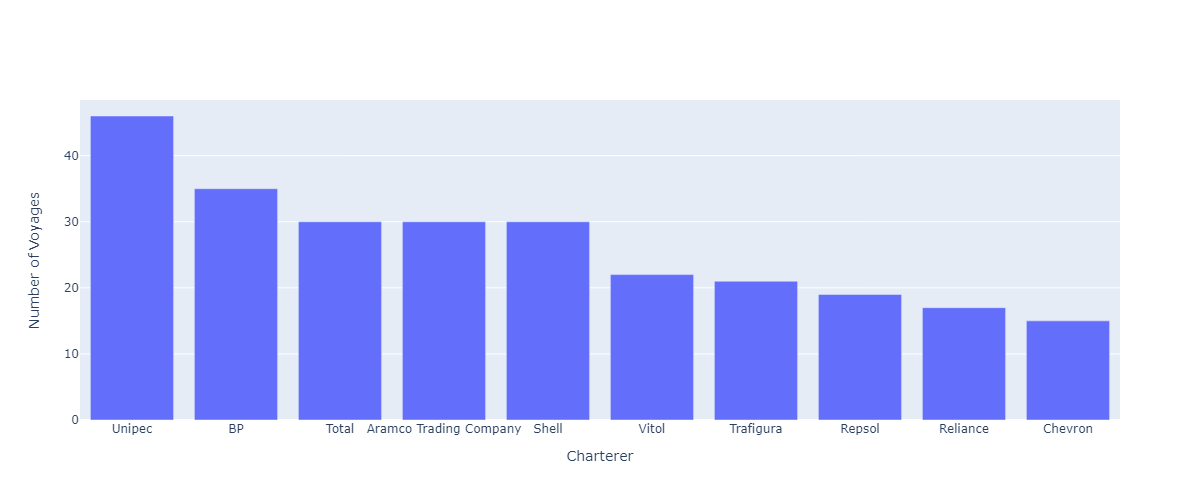

In [16]:
top_chrtr_fig = go.Figure()

bar = go.Bar(
    x=top_chrtr_df.Charterer.tolist(),
    y=top_chrtr_df.FixtureCount.tolist(),
)

top_chrtr_fig.add_trace(bar)
top_chrtr_fig.update_xaxes(title_text="Charterer")
top_chrtr_fig.update_yaxes(title_text="Number of Voyages")
top_chrtr_fig.show()

#### Vessels loading in specific areas

In this example, we will create a visualization, for the number of distinct vessels loading in specific areas per day over the next week

In [17]:
this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')
areas = data[data.load_name.notna()].load_name.value_counts().head().index.tolist()

areas

['Arabian Gulf', 'US Gulf', 'Continent', 'Sikka', 'Africa Atlantic Coast']

Create the pivot table

In [18]:
areas_mask = data.load_name.isin(areas) & data.laycan_from.isin(this_week_days)

df_areas = data[areas_mask]

df_pivot = pd.pivot_table(
    df_areas,
    columns='load_name',
    index='laycan_from',
    values='imo',
    aggfunc=pd.Series.nunique,
    fill_value=0,
).reindex(index=this_week_days, fill_value=0).reset_index().rename(columns={'index': 'laycan_from'})

df_pivot

load_name,laycan_from,Africa Atlantic Coast,Arabian Gulf,Continent,Sikka,US Gulf
0,2023-09-15 00:00:00+00:00,0,0,3,1,7
1,2023-09-16 00:00:00+00:00,0,6,4,1,3
2,2023-09-17 00:00:00+00:00,0,3,1,1,4
3,2023-09-18 00:00:00+00:00,0,3,4,3,2
4,2023-09-19 00:00:00+00:00,0,7,0,3,0
5,2023-09-20 00:00:00+00:00,2,6,0,3,3
6,2023-09-21 00:00:00+00:00,0,1,0,2,0


And display the results as timeseries

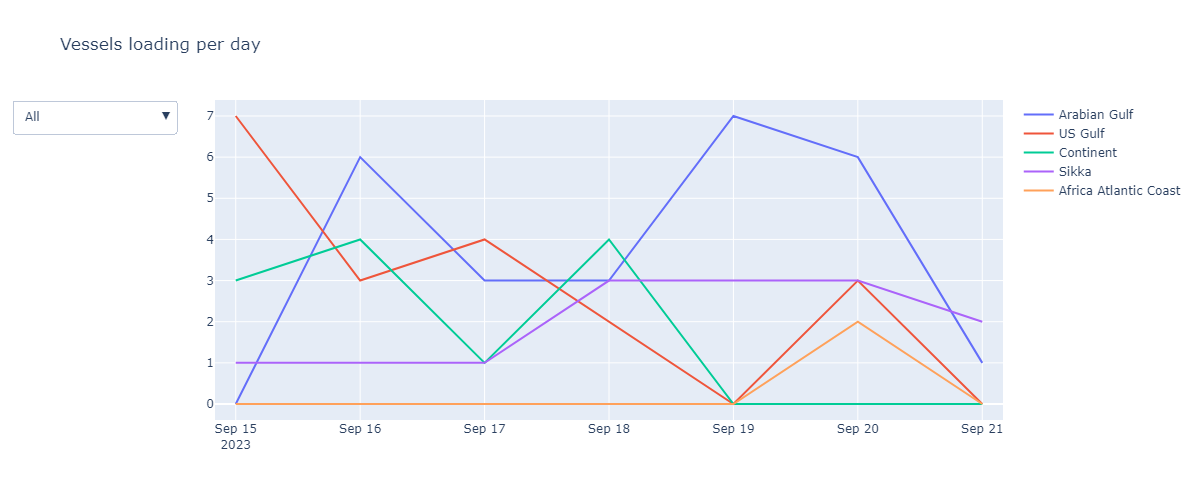

In [19]:
def area_button(area):
    args = [
        {'visible': [i == areas.index(area) for i in range(len(areas))]},
        {
            'title': f'Vessels loading in {area} per day',
            'showlegend': True
        },
    ]
    
    return dict(
        label=area,
        method='update',
        args=args,
    )

title = 'Vessels loading per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

areas_fig = go.Figure()

area_buttons = []

for area in areas:
    if area not in df_pivot.columns:
        continue
    area_scatter_plot = go.Scatter(    
        x=df_pivot.laycan_from,
        y=df_pivot[area],
        name=area,
        mode='lines',
    )

    areas_fig.add_trace(area_scatter_plot)
    
    area_buttons.append(area_button(area))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(areas))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *area_buttons,
])

areas_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

areas_fig.show()

#### Export data to csv

In [20]:
output_path = '' # Change output_path with your path
filename = 'last_week_fixtures.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)